# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = url + "&appid=" + weather_api_key + "&q="

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kabare
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | soyo
Processing Record 10 of Set 1 | palaikastron
Processing Record 11 of Set 1 | aklavik
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | marystown
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | japura
Processing Record 17 of Set 1 | kloulklubed
Processing Record 18 of Set 1 | cancun
Processing Record 19 of Set 1 | husavik
Processing Record 20 of Set 1 | nampula
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | upernavik
Processing Record 23 of Set 1 | katsuura
Processin

Processing Record 39 of Set 4 | kleck
City not found. Skipping...
Processing Record 40 of Set 4 | barrow
Processing Record 41 of Set 4 | chuy
Processing Record 42 of Set 4 | asosa
Processing Record 43 of Set 4 | hinton
Processing Record 44 of Set 4 | paris
Processing Record 45 of Set 4 | ahumada
City not found. Skipping...
Processing Record 46 of Set 4 | teguise
Processing Record 47 of Set 4 | biltine
Processing Record 48 of Set 4 | berlevag
Processing Record 49 of Set 4 | denpasar
Processing Record 0 of Set 5 | palmer
Processing Record 1 of Set 5 | darhan
Processing Record 2 of Set 5 | okha
Processing Record 3 of Set 5 | guasdualito
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | wanaka
Processing Record 6 of Set 5 | talnakh
Processing Record 7 of Set 5 | chokurdakh
Processing Record 8 of Set 5 | provideniya
Processing Record 9 of Set 5 | iqaluit
Processing Record 10 of Set 5 | fomboni
Processing Record 11 of Set 5 | vila velha
Processing Record 12 of Set

Processing Record 29 of Set 8 | puerto colombia
Processing Record 30 of Set 8 | sisophon
Processing Record 31 of Set 8 | urengoy
Processing Record 32 of Set 8 | bowling green
Processing Record 33 of Set 8 | ahipara
Processing Record 34 of Set 8 | obo
Processing Record 35 of Set 8 | hihifo
City not found. Skipping...
Processing Record 36 of Set 8 | sao joao do piaui
Processing Record 37 of Set 8 | chimbote
Processing Record 38 of Set 8 | abu samrah
Processing Record 39 of Set 8 | swan hill
Processing Record 40 of Set 8 | fort nelson
Processing Record 41 of Set 8 | bousso
Processing Record 42 of Set 8 | portree
Processing Record 43 of Set 8 | beringovskiy
Processing Record 44 of Set 8 | peniche
Processing Record 45 of Set 8 | kamina
Processing Record 46 of Set 8 | andros
Processing Record 47 of Set 8 | melilla
Processing Record 48 of Set 8 | saint-joseph
Processing Record 49 of Set 8 | siilinjarvi
Processing Record 0 of Set 9 | bitung
Processing Record 1 of Set 9 | letterkenny
Processing

City not found. Skipping...
Processing Record 19 of Set 12 | cabo san lucas
Processing Record 20 of Set 12 | demidov
Processing Record 21 of Set 12 | lac du bonnet
Processing Record 22 of Set 12 | chapais
Processing Record 23 of Set 12 | muncar
Processing Record 24 of Set 12 | hidalgotitlan
Processing Record 25 of Set 12 | bowen
Processing Record 26 of Set 12 | hashtrud
Processing Record 27 of Set 12 | udachnyy
Processing Record 28 of Set 12 | broadford
Processing Record 29 of Set 12 | vostok
Processing Record 30 of Set 12 | andros town
Processing Record 31 of Set 12 | virginia beach
Processing Record 32 of Set 12 | mujiayingzi
Processing Record 33 of Set 12 | najran
Processing Record 34 of Set 12 | upata
Processing Record 35 of Set 12 | kidal
Processing Record 36 of Set 12 | nantucket
Processing Record 37 of Set 12 | fuerte olimpo
Processing Record 38 of Set 12 | kalabo
Processing Record 39 of Set 12 | treinta y tres
Processing Record 40 of Set 12 | ekhabi
Processing Record 41 of Set 

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#pull relevant data
lati = city_data_df["Lat"]
m_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_spd = city_data_df["Wind Speed"]

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,299.33,84,75,7.20,US,1675632471
1,ushuaia,-54.8000,-68.3000,281.94,70,40,12.35,AR,1675632723
2,bluff,-46.6000,168.3333,288.10,85,57,11.03,NZ,1675632736
3,requena,39.4883,-1.1004,276.77,73,0,0.90,ES,1675632738
4,qaanaaq,77.4840,-69.3632,254.69,56,4,3.41,GL,1675632739


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,299.33,84,75,7.20,US,1675632471
1,ushuaia,-54.8000,-68.3000,281.94,70,40,12.35,AR,1675632723
2,bluff,-46.6000,168.3333,288.10,85,57,11.03,NZ,1675632736
3,requena,39.4883,-1.1004,276.77,73,0,0.90,ES,1675632738
4,qaanaaq,77.4840,-69.3632,254.69,56,4,3.41,GL,1675632739


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

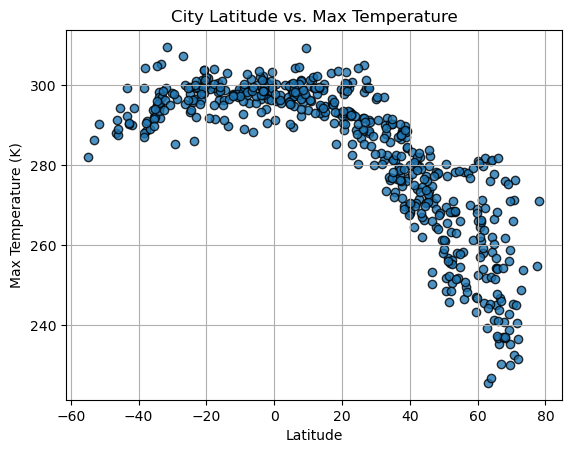

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lati,
           m_temp,
           edgecolor ="black", linewidth = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (K)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

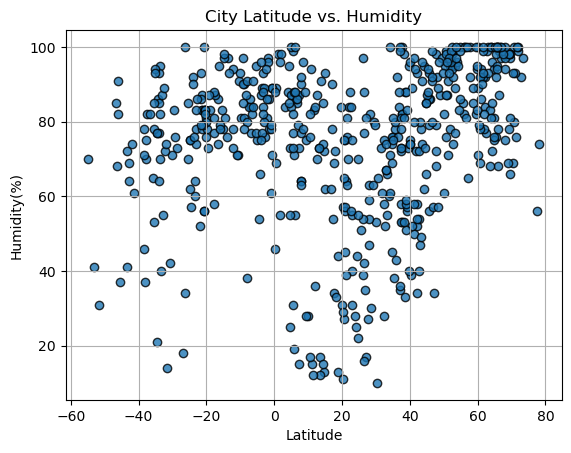

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lati,
           humidity,
           edgecolor ="black", linewidth = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

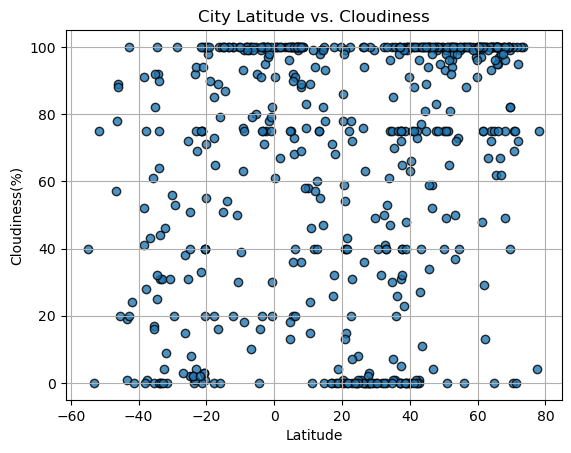

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lati,
           cloudiness,
           edgecolor ="black", linewidth = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

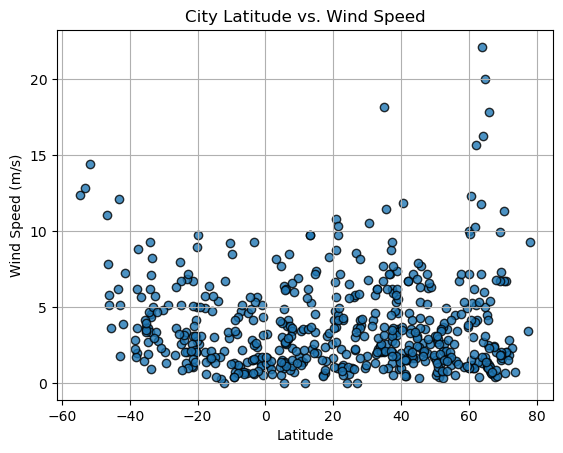

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lati,
           wind_spd,
           edgecolor ="black", linewidth = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,299.33,84,75,7.20,US,1675632471
3,requena,39.4883,-1.1004,276.77,73,0,0.90,ES,1675632738
4,qaanaaq,77.4840,-69.3632,254.69,56,4,3.41,GL,1675632739
5,nanortalik,60.1432,-45.2371,266.11,89,100,9.99,GL,1675632488
6,amberley,39.2048,-84.4280,284.23,56,100,4.63,US,1675632742


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,281.94,70,40,12.35,AR,1675632723
2,bluff,-46.6000,168.3333,288.10,85,57,11.03,NZ,1675632736
9,castro,-24.7911,-50.0119,293.14,75,51,2.53,BR,1675632752
10,vaini,-21.2000,-175.2000,299.24,83,75,1.03,TO,1675632462
14,labuhan,-6.8844,112.2051,298.61,84,100,2.20,ID,1675632754


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8583110139903071


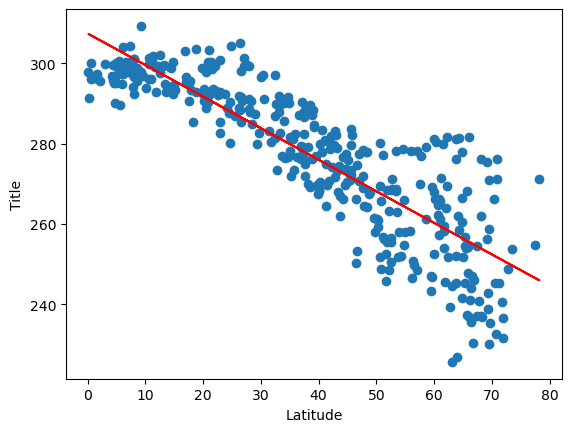

In [43]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-value is: 0.4508806736177519


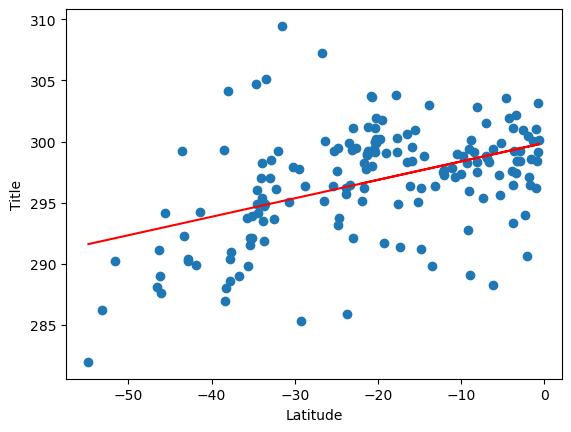

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** It is very clear that the closer a city is to the equator, or Latitude = 0, the warmer the temperature. What I find interesting is the less precise spread in the southern hemisphere compared to the northern. For example there are two cities near the same latitude of -30 yet have a temperature difference of almost 25 units this difference might be from elevation.   

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.414090851546432


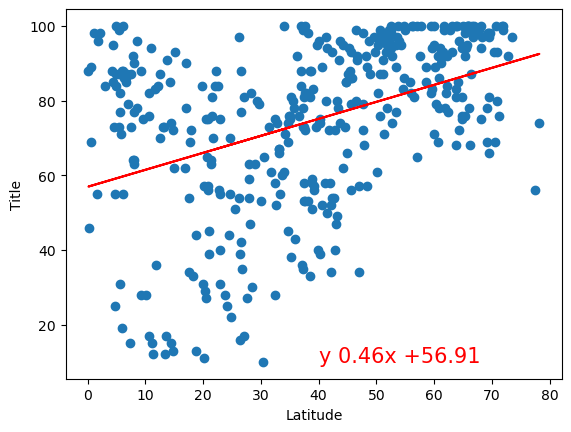

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-value is: 0.38729192022114406


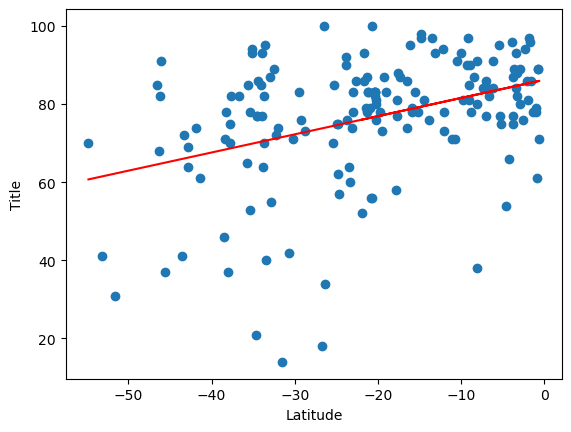

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** Although there is a slight corelation between latitude and humidity it is not as direct as temperature is with latitude. Humidity is obviously directly related to temperature as higher temperature evaporates more water, but temperature is not the only thing effecting humidity, that includes currents and wind, and the ecosystem as a whole such as is one area swampy or a desert or a mountain range, etc.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.22902981009297532


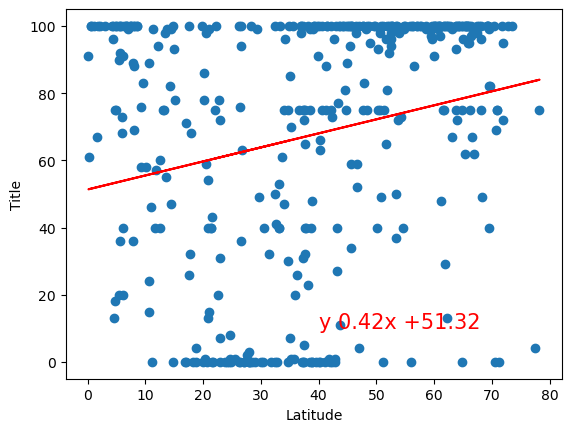

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-value is: 0.4048565065372473


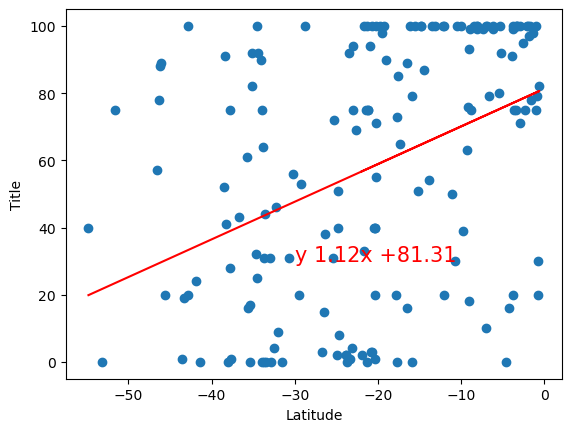

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** Much like latitude and humidity, latitude and "cloudiness" is not going to have a strong corelation as temperature is not the only factor that determines "cloudiness". It is also impacted by winds, elevation, and terrain to name a few other factors.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07134349546810273


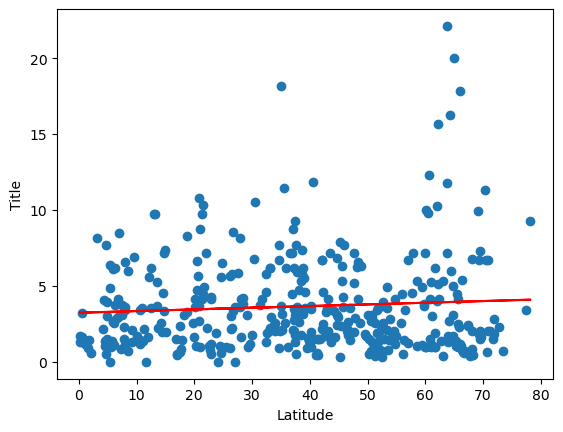

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-value is: -0.4460292414594783


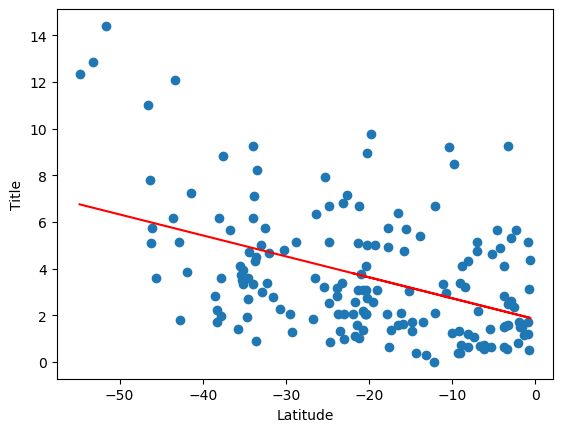

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** There is no corelation between wind speed and latitude at least not from these sets of data. Wind speed is determined by air pressure and there are multiple factors that influence air pressure, temperature is a big one but there is also different currents, elevation and the actual molecules of air themselves. As air is a mixture itself, different molecules such as polution will have impacts as well.